In [1]:
import os, sys, random, shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import cv2


%matplotlib inline
from matplotlib import patches
import numpy as np

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [11]:
#!python train.py --img 416 --batch 16 --epochs 300 --data /content/drive/MyDrive/yolo_model/data.yaml --cfg models/yolov5m.yaml --weights yolov5s.pt --project /content/drive/MyDrive/yolo_model


train: weights=yolov5s.pt, cfg=models/yolov5m.yaml, data=/content/drive/MyDrive/yolo_model/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/drive/MyDrive/yolo_model, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0,

In [ ]:
import shutil
#!if [ ! -d "yolov5" ]; then git clone 'https://github.com/ultralytics/yolov5.git'; fi
#!sed -i 's/PyYAML>=5.3.1/PyYAML==5.4.1/g' ./yolov5/requirements.txt
#shutil.copyfile('/content/drive/MyDrive/yolo_model/data.yaml', 'yolov5/data.yaml')
#!sed -i 's/nc: 80/nc: 2/g' ./yolov5/models/yolov5m.yaml


In [ ]:
#!pip install ultralytics

In [10]:
import os
print("Path to images exists:", os.path.exists('/content/drive/MyDrive/yolo_model/tobacco_yolo_format/images/valid/'))
print("Path to weights exists:", os.path.exists('/content/drive/MyDrive/yolo_model/exp/weights/best.pt'))

Path to images exists: True
Path to weights exists: True


In [ ]:
!python yolov5/detect.py --source /content/drive/MyDrive/yolo_model/tobacco_yolo_format/images/valid/ --weights '/content/drive/MyDrive/yolo_model/exp/weights/best.pt' \
--hide-labels --hide-conf --classes 1 --line-thickness 2 --save-txt


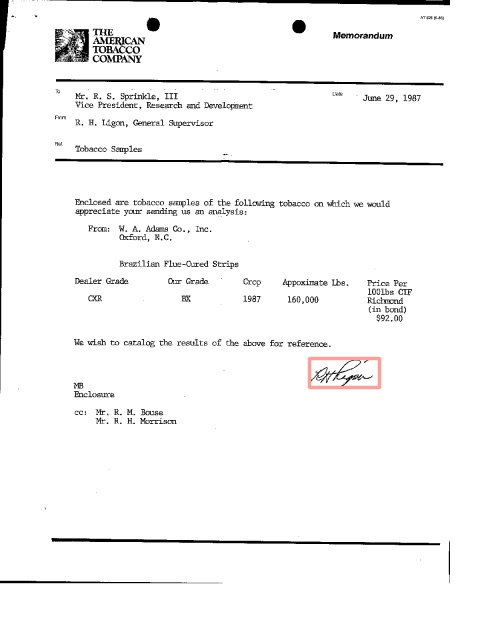

In [17]:
from IPython.display import Image, display

# Replace with the path of your output image
display(Image(filename='yolov5/runs/detect/exp2/zqc25f00_1.jpg'))

In [18]:
def yolo_to_pixel_coordinates(yolo_bbox, image_width, image_height):
    _, x_center, y_center, width, height = yolo_bbox

    x1 = (x_center - width / 2) * image_width
    y1 = (y_center - height / 2) * image_height
    x2 = (x_center + width / 2) * image_width
    y2 = (y_center + height / 2) * image_height

    return (x1, y1, x2, y2)




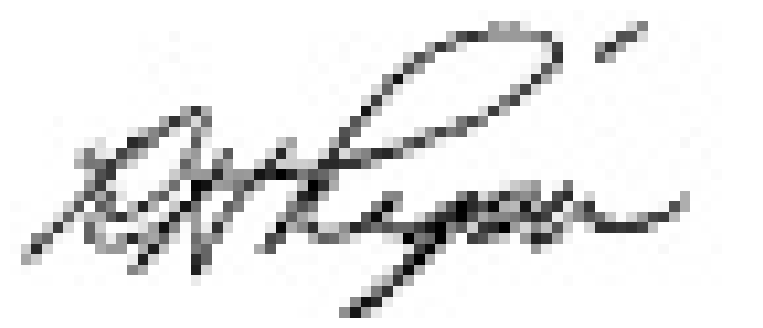

In [26]:
from PIL import Image

output_dir = "yolov5/runs/detect/exp2"
label_dir = os.path.join(output_dir, "labels")

# Example image name (replace with your actual file name)
example_image_name = "zqc25f00_1"

# Load bounding box coordinates
with open(os.path.join(label_dir, f"{example_image_name}.txt"), "r") as file:
    lines = file.readlines()

bboxes = [[float(value) for value in line.strip().split()] for line in lines]

# Load image
image_path = f"/content/drive/MyDrive/yolo_model/tobacco_yolo_format/images/valid/{example_image_name}.jpg"  # Adjust the file extension if needed
image = Image.open(image_path)
image_width, image_height = image.size

cropped_images = []

for yolo_bbox in bboxes:
    bbox = yolo_to_pixel_coordinates(yolo_bbox, image_width, image_height)
    cropped_image = image.crop(bbox)
    cropped_images.append(cropped_image)

fig, axes = plt.subplots(1, len(cropped_images), figsize=(12, 4))
plt.imshow(cropped_images[0])
plt.axis("off")

plt.show()